# Shape factor and stress-strain curve

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to investigate some plasticity!

In [ ]:
import micropip
await micropip.install("ipympl")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import sympy as sym

import ipywidgets as widgets

%matplotlib widget

In [3]:
fy = sym.S(235*10**6)
E = sym.S(210*10**9)
b = sym.nsimplify(1/10)
h = sym.nsimplify(3/10)
c = sym.symbols('c',positive=True)
Izz = b * h ** 3 /12 - (b * c **3 / 12)
eps_y = fy/E
kappa_e = eps_y / (h/2)
M_el = fy * Izz / (h / 2)

In [4]:
kappa = sym.symbols('kappa',positive=True)
k = sym.symbols('k',positive=True)
Izz_2 = b * k ** 3 /12 - (b * sym.Piecewise((c,c<k),(k,c>=k)) **3 / 12)
M_el_2 = fy * Izz_2 / (k / 2)
d = sym.Piecewise((k, k > c), (c, k <= c))
R_pl = b * ( h / 2 - d / 2) * fy
a = (h + d) / 2
M_pl = R_pl * a

M_el_2 = M_el_2.subs(k,kappa_e / kappa * h)
M_pl = M_pl.subs(k,kappa_e / kappa * h)
M_tot = M_el_2 + M_pl
alpha = (M_tot / M_el)
alpha = alpha.subs(kappa,kappa_e*1000000000)

M_pl_nump = sym.lambdify((kappa,c),M_pl)
M_el_nump = sym.lambdify(c,M_el)
M_tot_nump = sym.lambdify((kappa,c),M_tot)
alpha_nump = sym.lambdify(c,alpha)

interactive(children=(FloatSlider(value=0.0, description='Gap in cross-section:', max=0.2999997, step=0.001), …

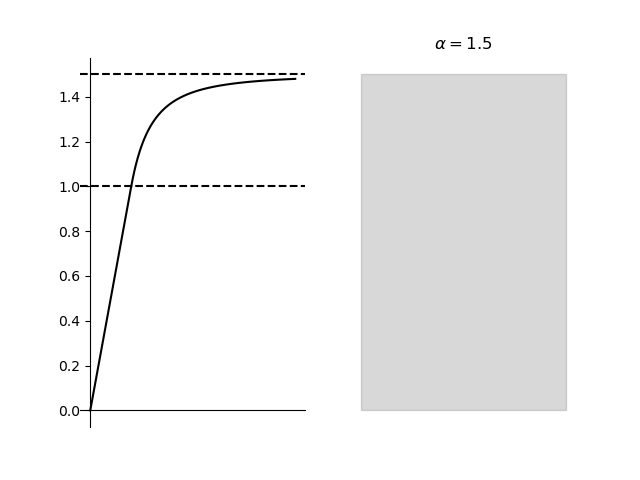

In [5]:
fig = plt.figure()
fig.tight_layout()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


b = float(b)
h = float(h)
c_slider = widgets.FloatSlider(value=0, min=0, max=h*0.999999, step=0.001, description='Gap in cross-section:')

def update_plot(c_nump):
    ax1.clear()  # Clear the existing plot
    ax2.clear()
    k_linspace = np.linspace(float(kappa_e),float(kappa_e)*5,100)
    ax1.plot(k_linspace,M_tot_nump(kappa = k_linspace, c = c_nump)/M_el_nump(c = c_nump),color='black')
    # add horizontal line at M_el_nump
    ax1.axhline(1,color='black',linestyle='--')
    ax1.axhline(M_tot_nump(kappa =float(kappa_e)*100, c = c_nump)/M_el_nump(c = c_nump),color='black',linestyle='--')
    ax1.plot([0,float(kappa_e)],[0,1],color='black')
    if c_nump == 0:
        ax2.fill_between([-b/2,b/2], [-h/2,-h/2], [h/2,h/2],color='grey', alpha=0.3)
    else:
        ax2.fill_between([-b/2,b/2], [-h/2,-h/2], [-c_nump/2,-c_nump/2], color='grey',alpha=0.3)
        ax2.fill_between([-b/2,b/2], [h/2,h/2], [c_nump/2,c_nump/2],color='grey', alpha=0.3)
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_position('zero')
    ax1.spines['left'].set_position('zero')
    ax1.set_xticks([])
    ax1.set_xticklabels([])
    ax2.axis('off')
    title = r'$\alpha=$'+str(np.round(alpha_nump(c = c_nump),3))
    ax2.set_title(title)
    plt.draw()  

widgets.interact(update_plot, c_nump = c_slider);
